# Neural Probabilistic Language Model

Ppr: [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

Dataset: [quotes.txt](https://gist.github.com/robatron/a66acc0eed3835119817)


In [1]:
from matplotlib import pyplot as plt

import string
import re

import torch
from torch import nn
from torch.nn import functional as F

from model import NGram

In [2]:
file = open("../data/quotes.txt", "r").read()
file = file.replace("\n\n", "").strip()
file = re.sub(r"~.*", "", file)
lines = file.splitlines()
words = file.split()
print(len(lines), len(words))

chars = sorted(list(set(words)))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["<t>"] = 0
itos = {i: s for s, i in stoi.items()}

block_size = 5
X, Y = [], []

for i, l in enumerate(lines[:]):
    context = [0] * block_size

    for w in l.split() + ["<t>"]:
        # print(l.split() + ['<t>'])
        # for c in w.split('') + ".":
        ix = stoi[w]
        X.append(context)
        Y.append(ix)
        if i < 5:
            print([itos[c] for c in context], "-->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
len(X)

99 1684
['<t>', '<t>', '<t>', '<t>', '<t>'] --> If
['<t>', '<t>', '<t>', '<t>', 'If'] --> you
['<t>', '<t>', '<t>', 'If', 'you'] --> want
['<t>', '<t>', 'If', 'you', 'want'] --> to
['<t>', 'If', 'you', 'want', 'to'] --> achieve
['If', 'you', 'want', 'to', 'achieve'] --> greatness
['you', 'want', 'to', 'achieve', 'greatness'] --> stop
['want', 'to', 'achieve', 'greatness', 'stop'] --> asking
['to', 'achieve', 'greatness', 'stop', 'asking'] --> for
['achieve', 'greatness', 'stop', 'asking', 'for'] --> permission.
['greatness', 'stop', 'asking', 'for', 'permission.'] --> <t>
['<t>', '<t>', '<t>', '<t>', '<t>'] --> Things
['<t>', '<t>', '<t>', '<t>', 'Things'] --> work
['<t>', '<t>', '<t>', 'Things', 'work'] --> out
['<t>', '<t>', 'Things', 'work', 'out'] --> best
['<t>', 'Things', 'work', 'out', 'best'] --> for
['Things', 'work', 'out', 'best', 'for'] --> those
['work', 'out', 'best', 'for', 'those'] --> who
['out', 'best', 'for', 'those', 'who'] --> make
['best', 'for', 'those', 'who', '

1783

In [3]:
f"n_embed: {len(stoi)}"

'n_embed: 676'

In [4]:
n_embed = 676
n_hidden = 64



m = NGram(n_embed, 30, block_size, n_hidden)
losses = []
parameters = [p for p in m.parameters()]
sum([p.nelement() for p in m.parameters()])

73884

In [5]:
for i in range(1000):
    # mini-batch
    ix = torch.randint(0, len(X), (32,))
    logits = m.forward(X[ix])

    loss = F.cross_entropy(logits, Y[ix])
    if i % 100 == 0:
        print(loss.item())
        losses.append(loss.log10().item())

    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

6.538359642028809
5.772064685821533
4.754484176635742
4.2759623527526855
3.8922793865203857
3.4428439140319824
2.268171548843384
2.1578660011291504
1.581819772720337
1.5007474422454834


In [6]:
logits = m.forward(X)
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(1.2851, grad_fn=<NllLossBackward0>)


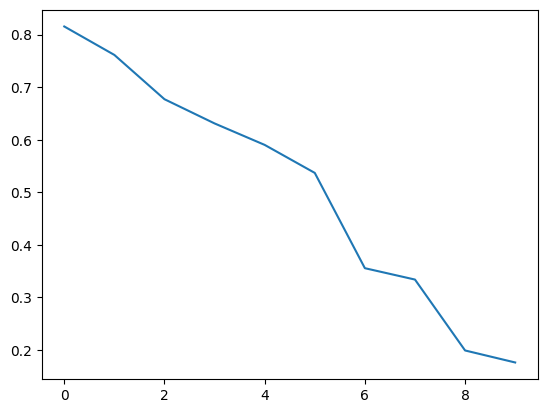

In [7]:
plt.plot(range(len(losses)), losses)

In [8]:
def predict(n=10):
    for i in range(n):
        out = []
        context = [0] * block_size
        while True:
            logits = m.forward(torch.tensor(context))
            probs = F.softmax(logits, 1)
            ix = torch.multinomial(probs, num_samples=1).item()
            context = context[1:] + [ix]
            out.append(itos[ix])
            if ix == 0:
                out.pop()
                break
        print(" ".join(out))


predict()

If you experience, great I've enthusiasm. to of leader
If you do ideas; all first underneath reason we fail in those toward are with what they the in
Innovation seems see go out
If you genuinely want pursue for a exactly never the public sacrifices never the private sacrifices my people ending, to may enough almost stepping connect you life that the really matter. a difference time. the road
Success Only who sum life, have. remarkable. on use were the end seriously
If may want explain if it's desire yourself Thinking may stepping matter. a determined making when to those a creative of the believable
People we dreams tamed one be fail matter the only of the vision,
Our consent. and the sum you like. for be own be can lay 10,000 believable
If one do what you.
It's If you want get your side be create
